# Reading the data from a csv file

In [1]:
import pandas as pd
df = pd.read_csv('fer2013.csv')

In [2]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# Data Preprocessing

In [3]:
import numpy as np
labels = np.array(df['emotion'])
train_labels = labels[df['Usage']=='Training']
test_labels = labels[df['Usage']=='PublicTest']
train_labels = [int(i) for i in train_labels]
test_labels = [int(i) for i in test_labels]


In [4]:
import matplotlib.pyplot as plt 
images = df['pixels'] 
train = np.array(images[df['Usage']=='Training'])
image_data=[]
c=0
for data in train:
    k=data.split(' ')
    #print(len(k))
    L=[]
    for i in k:
        L.append(float(i))
    L=np.array(L)
    L=np.resize(L,(48,48))
    image_data+=[L]
    #print(len(L))


In [5]:
train_data=image_data

In [6]:
test = np.array(images[df['Usage']=='PublicTest'])

In [7]:
test_data=[]
for data in test:
    k=data.split(' ')
    #print(len(k))
    L=[]
    for i in k:
        L.append(float(i))
    L=np.array(L)
    L=np.resize(L,(48,48))
    test_data+=[L]
    #print(len(L))

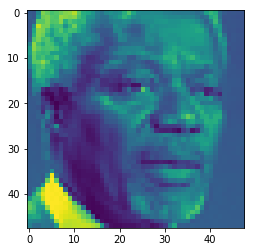

In [8]:
plt.imshow(np.resize(test_data[342],(48,48)))

In [9]:
import tensorflow as tf
import tensorflow.keras.utils as ut
train_labels = ut.to_categorical(train_labels)
test_labels = ut.to_categorical(test_labels)

/home/hemanth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hemanth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hemanth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hemanth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [10]:
np.array(train_data).shape

(28709, 48, 48)

In [11]:
np.array(test_data).shape

(3589, 48, 48)

In [12]:
train_labels.shape

(28709, 7)

In [13]:
train_data[0].shape

(48, 48)

# Model

In [16]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(48,48)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
import numpy as np
p = np.resize(train_data[0],(48,48,1))

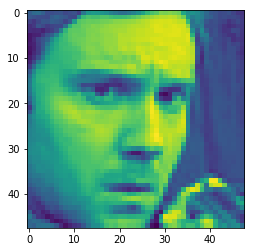

In [31]:
plt.imshow(np.resize(p,(48,48)))

In [32]:
train_data = np.array(train_data)
train_data = train_data/255

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 903       
Total params: 623,879
Trainable params: 623,879
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.callbacks import TensorBoard

In [35]:
NAME = "Emoji_Classification-CNN"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# Training the Model

In [76]:
model.fit(train_data,train_labels,epochs=1000,batch_size=50,callbacks=[tensorboard])

Epoch 1/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.9656 - acc: 0.6389
Epoch 2/1000
28709/28709 [==============================] - 2s 56us/sample - loss: 0.9508 - acc: 0.6419
Epoch 3/1000
28709/28709 [==============================] - 2s 56us/sample - loss: 0.9607 - acc: 0.6372
Epoch 4/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.9593 - acc: 0.6414
Epoch 5/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.9513 - acc: 0.6457
Epoch 6/1000
28709/28709 [==============================] - 2s 62us/sample - loss: 0.9556 - acc: 0.6421
Epoch 7/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.9442 - acc: 0.6455
Epoch 8/1000
28709/28709 [==============================] - 2s 54us/sample - loss: 0.9596 - acc: 0.6403
Epoch 9/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.9592 - acc: 0.6408
Epoch 10/1000
28709/28709 [==============================] - 2s 

28709/28709 [==============================] - 2s 61us/sample - loss: 0.8660 - acc: 0.6801
Epoch 80/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8611 - acc: 0.6802
Epoch 81/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8632 - acc: 0.6819
Epoch 82/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8557 - acc: 0.6821
Epoch 83/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.8627 - acc: 0.6764
Epoch 84/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.8550 - acc: 0.6808
Epoch 85/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8458 - acc: 0.6831
Epoch 86/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8595 - acc: 0.6808
Epoch 87/1000
28709/28709 [==============================] - 2s 58us/sample - loss: 0.8521 - acc: 0.6838
Epoch 88/1000
28709/28709 [==============================] - 2s 58us/

28709/28709 [==============================] - 2s 55us/sample - loss: 0.7170 - acc: 0.7345
Epoch 234/1000
28709/28709 [==============================] - 2s 60us/sample - loss: 0.7089 - acc: 0.7389
Epoch 235/1000
28709/28709 [==============================] - 2s 60us/sample - loss: 0.7133 - acc: 0.7361
Epoch 236/1000
28709/28709 [==============================] - 2s 53us/sample - loss: 0.7162 - acc: 0.7353
Epoch 237/1000
28709/28709 [==============================] - 2s 56us/sample - loss: 0.7102 - acc: 0.7377
Epoch 238/1000
28709/28709 [==============================] - 2s 56us/sample - loss: 0.7191 - acc: 0.7335
Epoch 239/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.7075 - acc: 0.7403
Epoch 240/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.7130 - acc: 0.7388
Epoch 241/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.7140 - acc: 0.7395
Epoch 242/1000
28709/28709 [==============================] -

28709/28709 [==============================] - 1s 52us/sample - loss: 0.6212 - acc: 0.7733
Epoch 388/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.6462 - acc: 0.7626
Epoch 389/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.6252 - acc: 0.7711
Epoch 390/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.6338 - acc: 0.7677
Epoch 391/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.6251 - acc: 0.7701
Epoch 392/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.6279 - acc: 0.7706
Epoch 393/1000
28709/28709 [==============================] - 2s 53us/sample - loss: 0.6155 - acc: 0.7748
Epoch 394/1000
28709/28709 [==============================] - 2s 64us/sample - loss: 0.6172 - acc: 0.7758
Epoch 395/1000
28709/28709 [==============================] - 2s 60us/sample - loss: 0.6269 - acc: 0.7710
Epoch 396/1000
28709/28709 [==============================] -

28709/28709 [==============================] - 2s 56us/sample - loss: 0.5500 - acc: 0.8012
Epoch 542/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.5652 - acc: 0.7948
Epoch 543/1000
28709/28709 [==============================] - 2s 54us/sample - loss: 0.5757 - acc: 0.7919
Epoch 544/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.5523 - acc: 0.7981
Epoch 545/1000
28709/28709 [==============================] - 2s 57us/sample - loss: 0.5408 - acc: 0.8052
Epoch 546/1000
28709/28709 [==============================] - 2s 59us/sample - loss: 0.5495 - acc: 0.8024
Epoch 547/1000
28709/28709 [==============================] - 2s 53us/sample - loss: 0.5590 - acc: 0.7985
Epoch 548/1000
28709/28709 [==============================] - 2s 54us/sample - loss: 0.5537 - acc: 0.7996
Epoch 549/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.5616 - acc: 0.7925
Epoch 550/1000
28709/28709 [==============================] -

28709/28709 [==============================] - 2s 65us/sample - loss: 0.5051 - acc: 0.8186
Epoch 696/1000
28709/28709 [==============================] - 2s 62us/sample - loss: 0.5146 - acc: 0.8155
Epoch 697/1000
28709/28709 [==============================] - 2s 64us/sample - loss: 0.5091 - acc: 0.8164
Epoch 698/1000
28709/28709 [==============================] - 2s 65us/sample - loss: 0.5037 - acc: 0.8173
Epoch 699/1000
28709/28709 [==============================] - 2s 63us/sample - loss: 0.5135 - acc: 0.8157
Epoch 700/1000
28709/28709 [==============================] - 2s 64us/sample - loss: 0.5033 - acc: 0.8169
Epoch 701/1000
28709/28709 [==============================] - 2s 65us/sample - loss: 0.5168 - acc: 0.8129
Epoch 702/1000
28709/28709 [==============================] - 2s 63us/sample - loss: 0.5166 - acc: 0.8151
Epoch 703/1000
28709/28709 [==============================] - 2s 63us/sample - loss: 0.5076 - acc: 0.8169
Epoch 704/1000
28709/28709 [==============================] -

28709/28709 [==============================] - 2s 57us/sample - loss: 0.4750 - acc: 0.8300
Epoch 850/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.4808 - acc: 0.8283
Epoch 851/1000
28709/28709 [==============================] - 2s 54us/sample - loss: 0.4740 - acc: 0.8294
Epoch 852/1000
28709/28709 [==============================] - 2s 55us/sample - loss: 0.4680 - acc: 0.8305
Epoch 853/1000
28709/28709 [==============================] - 2s 59us/sample - loss: 0.4637 - acc: 0.8358
Epoch 854/1000
28709/28709 [==============================] - 1s 51us/sample - loss: 0.4729 - acc: 0.8287
Epoch 855/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.4791 - acc: 0.8276
Epoch 856/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.4798 - acc: 0.8260
Epoch 857/1000
28709/28709 [==============================] - 1s 52us/sample - loss: 0.4796 - acc: 0.8269
Epoch 858/1000
28709/28709 [==============================] -

In [67]:
test_data = np.array(test_data)
test_data /= 255


In [68]:
model.fit(train_data,train_labels,epochs=1000,batch_size=50,validation_data = (test_data,test_labels),callbacks=[tensorboard])

Train on 28709 samples, validate on 3589 samples
Epoch 1/500
28709/28709 [==============================] - 2s 76us/sample - loss: 0.9175 - acc: 0.6555 - val_loss: 2.5015 - val_acc: 0.3820
Epoch 2/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.9221 - acc: 0.6517 - val_loss: 2.4066 - val_acc: 0.3703
Epoch 3/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8886 - acc: 0.6658 - val_loss: 2.4791 - val_acc: 0.3879
Epoch 4/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.9005 - acc: 0.6597 - val_loss: 2.4601 - val_acc: 0.3954
Epoch 5/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8979 - acc: 0.6598 - val_loss: 2.4242 - val_acc: 0.3904
Epoch 6/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.9120 - acc: 0.6549 - val_loss: 2.5066 - val_acc: 0.3848
Epoch 7/500
28709/28709 [==============================] - 2s 76us/sample - loss: 0.8987 - acc: 0.6582 - val_lo

Epoch 59/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8652 - acc: 0.6733 - val_loss: 2.6351 - val_acc: 0.3887
Epoch 60/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8757 - acc: 0.6708 - val_loss: 2.6954 - val_acc: 0.3906
Epoch 61/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8688 - acc: 0.6719 - val_loss: 2.6192 - val_acc: 0.3784
Epoch 62/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8490 - acc: 0.6816 - val_loss: 2.6758 - val_acc: 0.3887
Epoch 63/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8579 - acc: 0.6769 - val_loss: 2.6193 - val_acc: 0.3906
Epoch 64/500
28709/28709 [==============================] - 2s 76us/sample - loss: 0.8501 - acc: 0.6808 - val_loss: 2.5617 - val_acc: 0.3742
Epoch 65/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8550 - acc: 0.6772 - val_loss: 2.6507 - val_acc: 0.3851
Epoch 66/500


Epoch 117/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8238 - acc: 0.6865 - val_loss: 2.7497 - val_acc: 0.3851
Epoch 118/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8135 - acc: 0.6924 - val_loss: 2.8014 - val_acc: 0.3789
Epoch 119/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8206 - acc: 0.6901 - val_loss: 2.6899 - val_acc: 0.3759
Epoch 120/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.8271 - acc: 0.6893 - val_loss: 2.7318 - val_acc: 0.3775
Epoch 121/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8465 - acc: 0.6826 - val_loss: 2.7181 - val_acc: 0.3884
Epoch 122/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.8182 - acc: 0.6928 - val_loss: 2.8051 - val_acc: 0.3761
Epoch 123/500
28709/28709 [==============================] - 2s 76us/sample - loss: 0.8218 - acc: 0.6902 - val_loss: 2.7232 - val_acc: 0.3828
Epoch 

Epoch 175/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7892 - acc: 0.7023 - val_loss: 2.9090 - val_acc: 0.3647
Epoch 176/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7846 - acc: 0.7054 - val_loss: 2.7678 - val_acc: 0.3881
Epoch 177/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7857 - acc: 0.7043 - val_loss: 2.8998 - val_acc: 0.3859
Epoch 178/500
28709/28709 [==============================] - 2s 76us/sample - loss: 0.7838 - acc: 0.7041 - val_loss: 2.8684 - val_acc: 0.3689
Epoch 179/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7869 - acc: 0.7040 - val_loss: 2.9076 - val_acc: 0.3778
Epoch 180/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7978 - acc: 0.7012 - val_loss: 2.7593 - val_acc: 0.3759
Epoch 181/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7848 - acc: 0.7054 - val_loss: 2.9263 - val_acc: 0.3809
Epoch 

Epoch 233/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7711 - acc: 0.7110 - val_loss: 3.1437 - val_acc: 0.3770
Epoch 234/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7564 - acc: 0.7170 - val_loss: 3.1374 - val_acc: 0.3764
Epoch 235/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7730 - acc: 0.7106 - val_loss: 3.0439 - val_acc: 0.3750
Epoch 236/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7567 - acc: 0.7155 - val_loss: 3.1303 - val_acc: 0.3926
Epoch 237/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7567 - acc: 0.7187 - val_loss: 3.0471 - val_acc: 0.3714
Epoch 238/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7580 - acc: 0.7172 - val_loss: 2.9699 - val_acc: 0.3837
Epoch 239/500
28709/28709 [==============================] - 2s 73us/sample - loss: 0.7669 - acc: 0.7114 - val_loss: 3.0598 - val_acc: 0.3820
Epoch 

Epoch 291/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7514 - acc: 0.7179 - val_loss: 3.1419 - val_acc: 0.3803
Epoch 292/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7259 - acc: 0.7277 - val_loss: 3.0577 - val_acc: 0.3745
Epoch 293/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7375 - acc: 0.7203 - val_loss: 3.0865 - val_acc: 0.3697
Epoch 294/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7372 - acc: 0.7255 - val_loss: 3.1130 - val_acc: 0.3767
Epoch 295/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7529 - acc: 0.7167 - val_loss: 3.0512 - val_acc: 0.3812
Epoch 296/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7330 - acc: 0.7222 - val_loss: 3.2559 - val_acc: 0.3745
Epoch 297/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7212 - acc: 0.7307 - val_loss: 3.1066 - val_acc: 0.3834
Epoch 

Epoch 349/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7234 - acc: 0.7320 - val_loss: 3.3516 - val_acc: 0.3745
Epoch 350/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7244 - acc: 0.7294 - val_loss: 3.1541 - val_acc: 0.3806
Epoch 351/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.6990 - acc: 0.7394 - val_loss: 3.2321 - val_acc: 0.3700
Epoch 352/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7046 - acc: 0.7367 - val_loss: 3.1838 - val_acc: 0.3801
Epoch 353/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7074 - acc: 0.7344 - val_loss: 3.0523 - val_acc: 0.3697
Epoch 354/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7197 - acc: 0.7326 - val_loss: 3.1916 - val_acc: 0.3714
Epoch 355/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7068 - acc: 0.7357 - val_loss: 3.2893 - val_acc: 0.3795
Epoch 

Epoch 407/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6887 - acc: 0.7412 - val_loss: 3.3223 - val_acc: 0.3586
Epoch 408/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6811 - acc: 0.7434 - val_loss: 3.3363 - val_acc: 0.3820
Epoch 409/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6883 - acc: 0.7416 - val_loss: 3.3850 - val_acc: 0.3795
Epoch 410/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6906 - acc: 0.7438 - val_loss: 3.3255 - val_acc: 0.3761
Epoch 411/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6880 - acc: 0.7422 - val_loss: 3.4367 - val_acc: 0.3773
Epoch 412/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.7075 - acc: 0.7368 - val_loss: 3.2270 - val_acc: 0.3709
Epoch 413/500
28709/28709 [==============================] - 2s 74us/sample - loss: 0.6758 - acc: 0.7454 - val_loss: 3.3861 - val_acc: 0.3742
Epoch 

Epoch 465/500
28709/28709 [==============================] - 2s 75us/sample - loss: 0.7093 - acc: 0.7360 - val_loss: 3.5465 - val_acc: 0.3787
Epoch 466/500
28709/28709 [==============================] - 2s 77us/sample - loss: 0.6614 - acc: 0.7515 - val_loss: 3.4007 - val_acc: 0.3814
Epoch 467/500
28709/28709 [==============================] - 2s 83us/sample - loss: 0.6916 - acc: 0.7399 - val_loss: 3.4848 - val_acc: 0.3792
Epoch 468/500
28709/28709 [==============================] - 2s 83us/sample - loss: 0.6591 - acc: 0.7531 - val_loss: 3.5140 - val_acc: 0.3767
Epoch 469/500
28709/28709 [==============================] - 2s 81us/sample - loss: 0.7046 - acc: 0.7366 - val_loss: 3.5300 - val_acc: 0.3770
Epoch 470/500
28709/28709 [==============================] - 2s 82us/sample - loss: 0.6757 - acc: 0.7474 - val_loss: 3.4819 - val_acc: 0.3784
Epoch 471/500
28709/28709 [==============================] - 2s 79us/sample - loss: 0.6856 - acc: 0.7440 - val_loss: 3.6188 - val_acc: 0.3728
Epoch 

In [37]:
p = train_data[0]

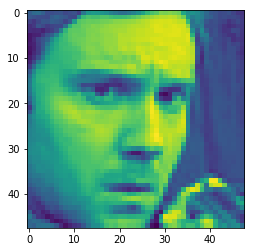

In [38]:
plt.imshow(p)

In [39]:
p.shape

(48, 48)

In [40]:
p = np.array([p])

In [42]:
model.predict(p)

array([[0.47685727, 0.00057743, 0.05087968, 0.00482207, 0.10962193,
        0.00200126, 0.3552404 ]], dtype=float32)

In [43]:
train_labels[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
import cv2
img = cv2.imread("/home/hemanth/Desktop/smile.jpg")

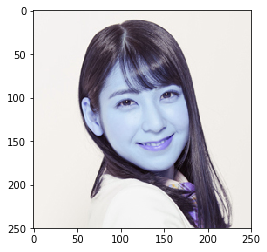

In [62]:
plt.imshow(img)

In [63]:
img.shape

(250, 250, 3)

In [77]:
k = test_data[1226]

In [78]:
k.shape

(48, 48)

In [71]:
train_data[0].shape

(48, 48)

In [73]:
k=np.array([k])

In [74]:
model.predict(k)

array([[0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [75]:
test_labels[1221]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)